# Now we will compare the there .csv files in this file we will see things which are imporatnt to our busness objectives here 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
 #Read the CSV files
df_benin  = pd.read_csv('C:/Users/huawei/Desktop/Tenx/week-0/april-23/data/MoonLight-Energy-Solutions/Data/benin-malanville.csv')
df_sierra = pd.read_csv('C:/Users/huawei/Desktop/Tenx/week-0/april-23/data/MoonLight-Energy-Solutions/Data/sierraleone-bumbuna.csv')
df_togo = pd.read_csv('C:/Users/huawei/Desktop/Tenx/week-0/april-23/data/MoonLight-Energy-Solutions/Data/togo-dapaong_qc.csv')




In [3]:
# Display the first few rows of each dataset
print("First few rows of Togo-Dapaong_QC:")
print(df_togo.head())
print()

print("First few rows of Sierra Leone-Bumbuna:")
print(df_sierra.head())
print()

print("First few rows of Benin-Malanville:")
print(df_benin.head())
print()

First few rows of Togo-Dapaong_QC:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  

In [3]:

# Check the shape (number of rows and columns) of each dataset
print("Shape of Togo-Dapaong_QC:", df_togo.shape)
print("Shape of Sierra Leone-Bumbuna:", df_sierra.shape)
print("Shape of Benin-Malanville:", df_benin.shape)
print()

Shape of Togo-Dapaong_QC: (525600, 19)
Shape of Sierra Leone-Bumbuna: (525600, 19)
Shape of Benin-Malanville: (525600, 19)



In [5]:

# Check the data types of each column
print("Data types in Togo-Dapaong_QC:")
print(df_togo.dtypes)
print()

print("Data types in Sierra Leone-Bumbuna:")
print(df_sierra.dtypes)
print()

print("Data types in Benin-Malanville:")
print(df_benin.dtypes)
print()

Data types in Togo-Dapaong_QC:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

Data types in Sierra Leone-Bumbuna:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            f

In [4]:
# Remove null columns from Togo-Dapaong_QC
df_togo = df_togo.dropna(axis=1, how='all')

# Remove null columns from Sierra Leone-Bumbuna
df_sierra = df_sierra.dropna(axis=1, how='all')

# Remove null columns from Benin-Malanville
df_benin = df_benin.dropna(axis=1, how='all')

print("Shape of Togo-Dapaong_QC:", df_togo.shape)
print("Shape of Sierra Leone-Bumbuna:", df_sierra.shape)
print("Shape of Benin-Malanville:", df_benin.shape)
print()

Shape of Togo-Dapaong_QC: (525600, 18)
Shape of Sierra Leone-Bumbuna: (525600, 18)
Shape of Benin-Malanville: (525600, 18)



In [5]:
# function to remove anomalites
def remove_anomalies(df):
    # Calculate the z-score for each column
    z_scores = np.abs((df - df.mean()) / df.std())

    # Set a threshold for anomaly detection (e.g., z-score greater than 3)
    threshold = 3

    # Identify the indices of rows containing anomalies
    anomaly_indices = np.where(z_scores > threshold)

    # Remove rows with anomalies
    df_cleaned = df.drop(anomaly_indices[0])

    return df_cleaned

In [ ]:
# Remove anomalies from Togo-Dapaong_QC
df_togo_cleaned = remove_anomalies(df_togo)

# Remove anomalies from Sierra Leone-Bumbuna
df_sierra_cleaned = remove_anomalies(df_sierra)

# Remove anomalies from Benin-Malanville
df_benin_cleaned = remove_anomalies(df_benin)

In [6]:

# Let's Select this 3 columns and check the diffrence in mean , mode , median 
columns = ['DHI', 'GHI', 'DNI']
df_bm_selected = df_benin [columns]
df_sb_selected = df_sierra [columns]
df_td_selected = df_togo[columns]

# Calculate statistical measures for each column
df_bm_stats = df_bm_selected.describe()
df_sb_stats = df_sb_selected.describe()
df_td_stats = df_td_selected.describe()

# Compare the statistical measures
print("Statistics for :benin-malanville")
print(df_bm_stats)
print()

print("Statistics for File sierraleone-bumbuna:")
print(df_sb_stats)
print()

print("Statistics for File togo-dapaong_qc:")
print(df_td_stats)

print(" Based on the data we can see , Benin-Malanville generally experiences high solar radiation levels, while Sierra Leone-Bumbuna shows lower radiation. Togo-Dapaong_QC has considerable zero values for DHI and DNI.")

Statistics for :benin-malanville
                 DHI            GHI            DNI
count  525600.000000  525600.000000  525600.000000
mean      115.358961     240.559452     167.187516
std       158.691074     331.131327     261.710501
min       -12.600000     -12.900000      -7.800000
25%        -2.100000      -2.000000      -0.500000
50%         1.600000       1.800000      -0.100000
75%       216.300000     483.400000     314.200000
max       759.200000    1413.000000     952.300000

Statistics for File sierraleone-bumbuna:
                 DHI            GHI            DNI
count  525600.000000  525600.000000  525600.000000
mean      113.720571     201.957515     116.376337
std       158.946032     298.495150     218.652659
min       -17.900000     -19.500000      -7.800000
25%        -3.800000      -2.800000      -0.300000
50%        -0.100000       0.300000      -0.100000
75%       224.700000     362.400000     107.000000
max       892.000000    1499.000000     946.000000

Statis

In [ ]:
# Temperature Analysis

In [ ]:
#Generate scatter plots for each CSV file:

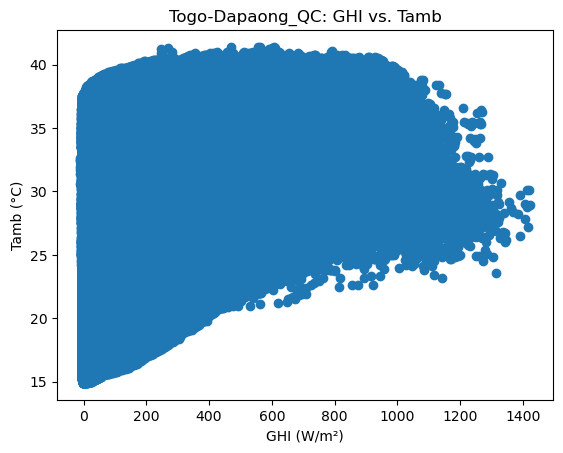

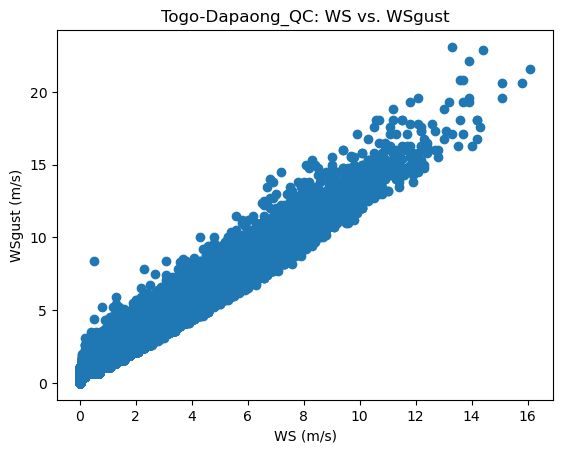

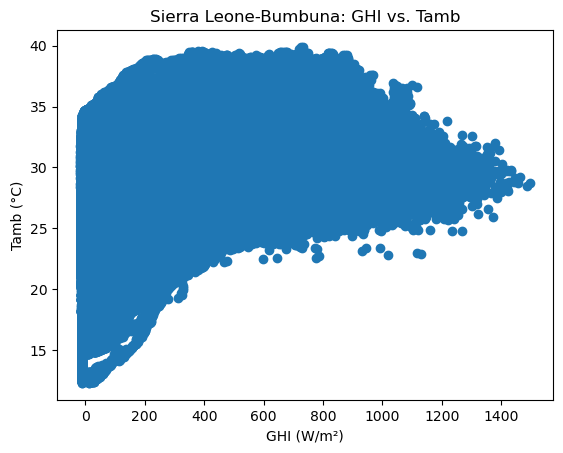

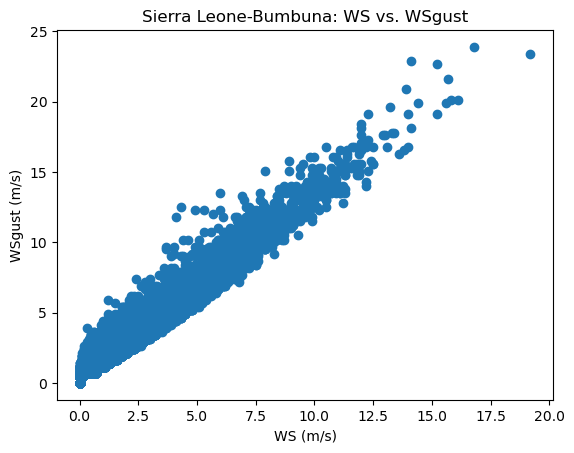

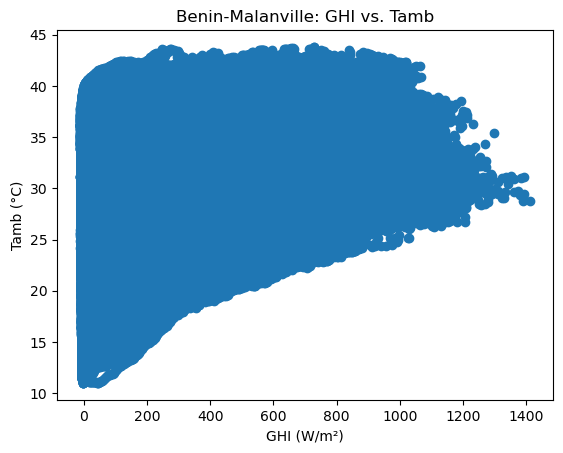

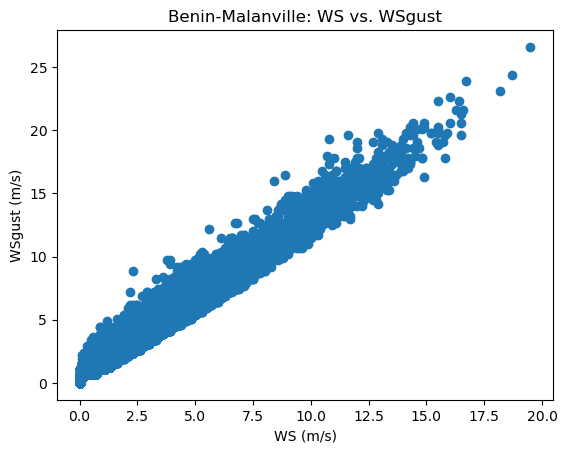

In [7]:
# Togo-Dapaong_QC
plt.scatter(df_togo['GHI'], df_togo['Tamb'])
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('Togo-Dapaong_QC: GHI vs. Tamb')
plt.show()

plt.scatter(df_togo['WS'], df_togo['WSgust'])
plt.xlabel('WS (m/s)')
plt.ylabel('WSgust (m/s)')
plt.title('Togo-Dapaong_QC: WS vs. WSgust')
plt.show()

# Sierra Leone-Bumbuna
plt.scatter(df_sierra['GHI'], df_sierra['Tamb'])
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('Sierra Leone-Bumbuna: GHI vs. Tamb')
plt.show()

plt.scatter(df_sierra['WS'], df_sierra['WSgust'])
plt.xlabel('WS (m/s)')
plt.ylabel('WSgust (m/s)')
plt.title('Sierra Leone-Bumbuna: WS vs. WSgust')
plt.show()

# Benin-Malanville
plt.scatter(df_benin['GHI'], df_benin['Tamb'])
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('Benin-Malanville: GHI vs. Tamb')
plt.show()

plt.scatter(df_benin['WS'], df_benin['WSgust'])
plt.xlabel('WS (m/s)')
plt.ylabel('WSgust (m/s)')
plt.title('Benin-Malanville: WS vs. WSgust')
plt.show()

In [ ]:
#Generate a chart to compare the results:

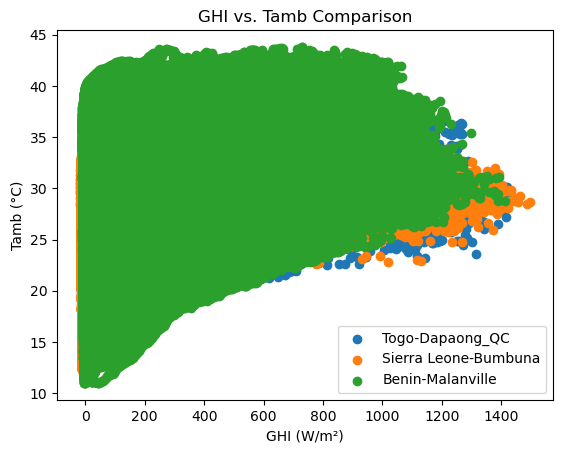

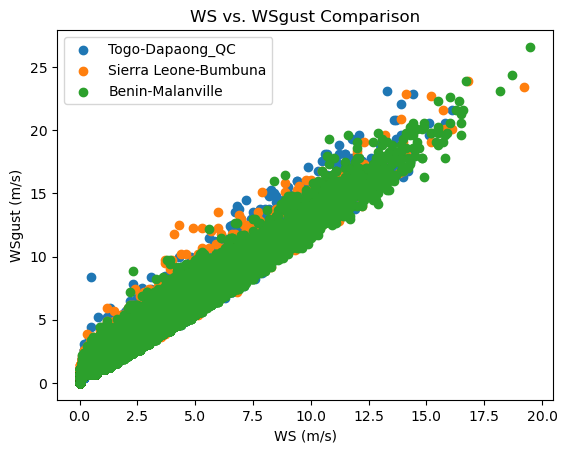

In [4]:
# Compare GHI vs. Tamb for all three CSV files
plt.scatter(df_togo['GHI'], df_togo['Tamb'], label='Togo-Dapaong_QC')
plt.scatter(df_sierra['GHI'], df_sierra['Tamb'], label='Sierra Leone-Bumbuna')
plt.scatter(df_benin['GHI'], df_benin['Tamb'], label='Benin-Malanville')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('GHI vs. Tamb Comparison')
plt.legend()
plt.show()

# Compare WS vs. WSgust for all three CSV files
plt.scatter(df_togo['WS'], df_togo['WSgust'], label='Togo-Dapaong_QC')
plt.scatter(df_sierra['WS'], df_sierra['WSgust'], label='Sierra Leone-Bumbuna')
plt.scatter(df_benin['WS'], df_benin['WSgust'], label='Benin-Malanville')
plt.xlabel('WS (m/s)')
plt.ylabel('WSgust (m/s)')
plt.title('WS vs. WSgust Comparison')
plt.legend()
plt.show()

In [ ]:
#heatMaps 

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


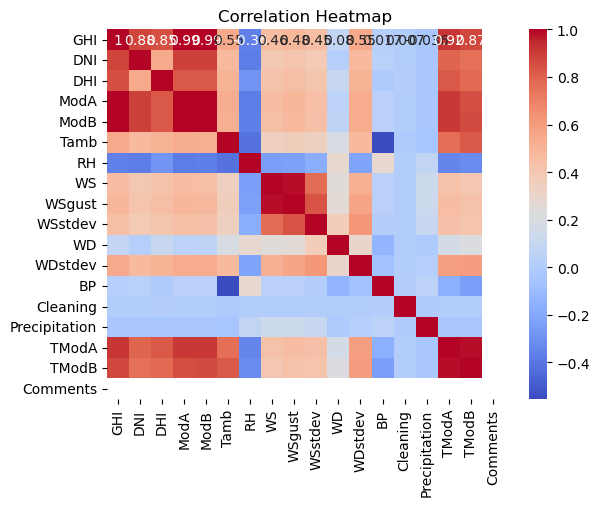

In [5]:

# Assuming your data is loaded into a pandas DataFrame called 'data'
# Check if the columns you specified exist in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'modA', 'modB', 'Tamb', 'wd', 'RH', 'Ws', 'Bp']
if not all(col in df_benin.columns for col in required_columns):
  missing_columns = [col for col in required_columns if col not in df_benin.columns]
  print(f"Warning: Following columns are not found in your data: {', '.join(missing_columns)}")

# Filter for numerical columns for heatmap creation (optional)
numerical_cols = df_benin.select_dtypes(include=['float64', 'int64']).columns
if set(required_columns) & set(numerical_cols) != set(required_columns):
  non_numerical_cols = [col for col in required_columns if col not in numerical_cols]
  print(f"Warning: Following columns are not numerical and will be excluded from the heatmap: {', '.join(non_numerical_cols)}")
  # Filter to numerical columns for heatmap
  df_benin = df_benin[numerical_cols]

# Create a heatmap using seaborn
sns.heatmap(df_benin.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


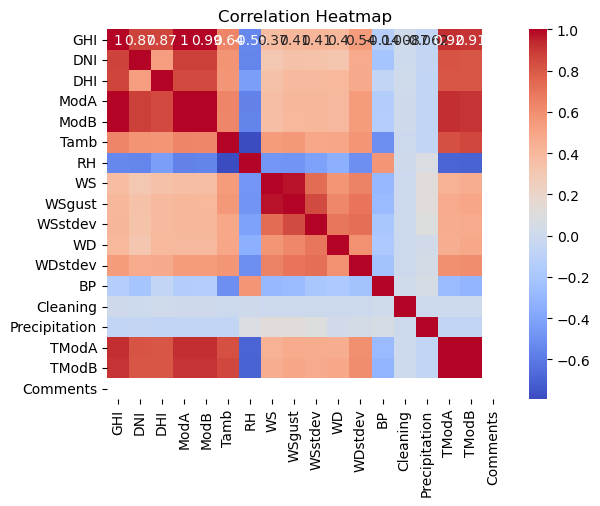

In [6]:
# Assuming your data is loaded into a pandas DataFrame called 'data'
# Check if the columns you specified exist in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'modA', 'modB', 'Tamb', 'wd', 'RH', 'Ws', 'Bp']
if not all(col in df_sierra.columns for col in required_columns):
  missing_columns = [col for col in required_columns if col not in df_sierra.columns]
  print(f"Warning: Following columns are not found in your data: {', '.join(missing_columns)}")

# Filter for numerical columns for heatmap creation (optional)
numerical_cols = df_benin.select_dtypes(include=['float64', 'int64']).columns
if set(required_columns) & set(numerical_cols) != set(required_columns):
  non_numerical_cols = [col for col in required_columns if col not in numerical_cols]
  print(f"Warning: Following columns are not numerical and will be excluded from the heatmap: {', '.join(non_numerical_cols)}")
  # Filter to numerical columns for heatmap
  df_sierra = df_sierra[numerical_cols]

# Create a heatmap using seaborn
sns.heatmap(df_sierra.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\huawei\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


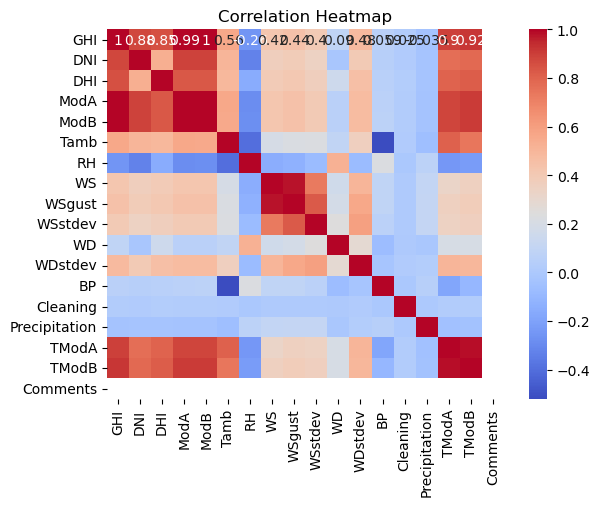

In [7]:

# Check if the columns you specified exist in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'modA', 'modB', 'Tamb', 'wd', 'RH', 'Ws', 'Bp']
if not all(col in df_togo.columns for col in required_columns):
  missing_columns = [col for col in required_columns if col not in df_togo.columns]
  print(f"Warning: Following columns are not found in your data: {', '.join(missing_columns)}")

# Filter for numerical columns for heatmap creation 
numerical_cols = df_togo.select_dtypes(include=['float64', 'int64']).columns
if set(required_columns) & set(numerical_cols) != set(required_columns):
  non_numerical_cols = [col for col in required_columns if col not in numerical_cols]
  print(f"Warning: Following columns are not numerical and will be excluded from the heatmap: {', '.join(non_numerical_cols)}")
  # Filter to numerical columns for heatmap
  df_togo = df_togo[numerical_cols]

# Create a heatmap using seaborn
sns.heatmap(df_togo.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()